## Final Code Reproducibility Check
Big Neuro - Auditory

Includes:
Figures 1-14 in the Report

Please see requirements.txt for required Python Libraries,
and use Python3

In [1]:
import h5py
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import scipy.signal as signal
import pandas as pd
from statsmodels.formula.api import ols
from sklearn.utils import resample
from sklearn.utils import shuffle
import preprocessing.data_cleaning_tools as dt

C:\Users\Kenneth\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# read the audio file
audio_path = "data/19120_2_00004_audio.flac"

# for entire data
audio_samples, sr = sf.read(audio_path)

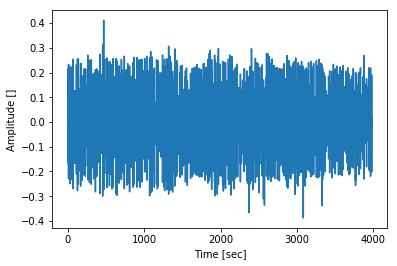

In [3]:
# FIG 1
# plot of audio data (downsampled)
downsample_rate = 10000
audio_samples_downsampled = audio_samples[::downsample_rate]
times = np.arange(len(audio_samples_downsampled)) / sr * downsample_rate # generate time stamps
fig, ax = plt.subplots()
ax.plot(times, audio_samples_downsampled)

ax.xaxis.set_major_locator(plticker.MultipleLocator(base=1000.0)) # set major ticks at every 10 seconds
plt.ylabel('Amplitude []')
plt.xlabel('Time [sec]')
plt.show()

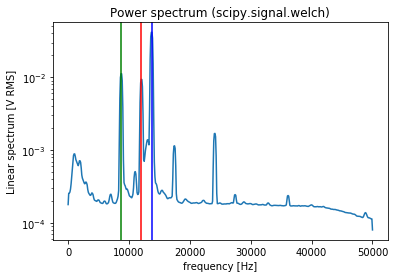

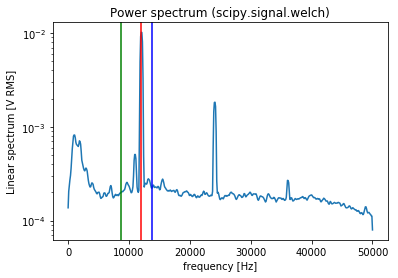

In [4]:
# FIG 2
# first 60 second
y60, sr60 = sf.read(audio_path, stop = 60 * sr)
f, Pxx_spec = signal.welch(y60, sr60, 'flattop', 1024, scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.title('Power spectrum (scipy.signal.welch)')
# we see these frequencIEs by eye which we followed what Jacob wanted us to do at the beginning.
# so we have to hard code it here for validation.
plt.axvline(x = 12050, color = 'red') 
plt.axvline(x = 8750, color = 'green')
plt.axvline(x = 13700, color = 'blue')
plt.show()

# FIG 3
# # no activity
y1, sr1 = sf.read(audio_path, start = 45 * sr, stop = 46 * sr)
f, Pxx_spec = signal.welch(y1, sr1, 'flattop', 1024, scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.title('Power spectrum (scipy.signal.welch)')
# we see these frequenceis by eye which we followed what Jacob wanted us to do at the beginning.
# so we have to hard code it here for validation.
plt.axvline(x = 12050, color = 'red')
plt.axvline(x = 8750, color = 'green')
plt.axvline(x = 13700, color = 'blue')
plt.show()

In [ ]:
# FIG 4
# spectrogram (takes a very very long time)
frequencies, times, spectrogram = signal.spectrogram(audio_samples, sr, nperseg=8000)
spec = np.log(spectrogram)
plt.pcolormesh(times, frequencies, spec, cmap = 'Spectral')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

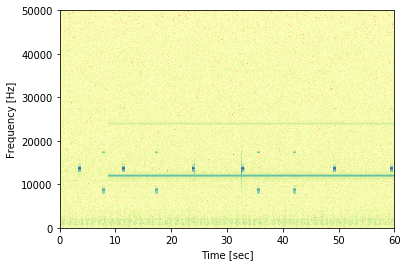

In [33]:
# FIG 5
# spectrogram of the first minute
frequencies, times, spectrogram = signal.spectrogram(y60, sr60, nperseg=1000)
spec = np.log(spectrogram)
plt.pcolormesh(times, frequencies, spec, cmap = 'Spectral')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

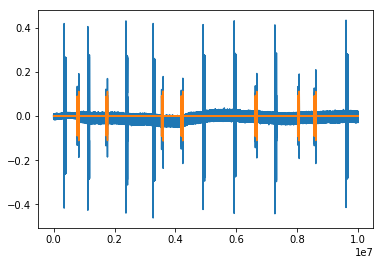

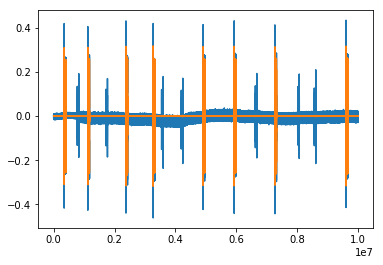

In [34]:
# FIG 6
first_100_seconds = audio_samples[:100 * sr]
plt.plot(first_100_seconds)
plt.plot(dt.butter_bandpass_filter(first_100_seconds, 8600, 8800, sr))
plt.show() # the colors may be different due to pyplot choosing different colors

# FIG 7
plt.plot(first_100_seconds)
plt.plot(dt.butter_bandpass_filter(first_100_seconds, 13600, 13800, sr))
plt.show() # the colors may be different due to pyplot choosing different colors

Available datasets: ['audio_peak_12000', 'audio_peak_13700', 'audio_peak_8750', 'cell_traces', 'frame_times', 'pupil_radius', 'treadmill_velocity']


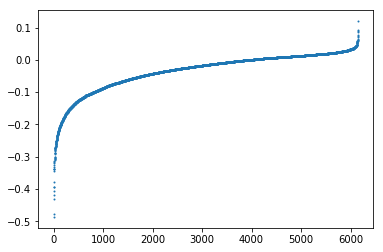

In [35]:
filename = "data/19120_2_00004_spikes_and_times_v2_preprocessed_training.h5"
with h5py.File(filename, 'r') as f:
   print('Available datasets:', list(f.keys()))
   cell_traces = np.array(f['cell_traces'])
   frame_times = np.array(f['frame_times'])
   audio_peak_8750 = np.array(f['audio_peak_8750'])
   audio_peak_13700 = np.array(f['audio_peak_13700'])
   pupil_radius = np.array(f['pupil_radius'])
   treadmill_velocity = np.array(f['treadmill_velocity'])


#create list for corr coeff for each cell and treadmill
corr_list = []
for x in range(cell_traces.shape[0]):
   array = np.corrcoef(cell_traces[x],treadmill_velocity)
   corr_list.append([array[0,1]])

# FIG 8
#sort and plot
corr_list.sort()
corr_array = np.array(corr_list)
plt.scatter([x+1 for x in list(range(cell_traces.shape[0]))], corr_array, s=1)

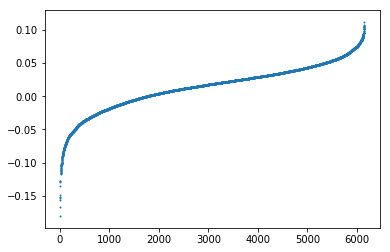

In [36]:
#create list for corr coeff for each cell and pupil
corr_list = []
for x in range(cell_traces.shape[0]):
   array = np.corrcoef(cell_traces[x],pupil_radius)
   corr_list.append([array[0,1]])

# FIG 9
#sort and plot
corr_list.sort()
corr_array = np.array(corr_list)
plt.scatter([x+1 for x in list(range(cell_traces.shape[0]))], corr_array, s=1)
# sorry for my bad python but here's the two plots of correlation for pupil and treadmill. didn't redo the 3d one yet because i didn't see the xyz coordinates in the h5. are the xyz coordinates getting input to the reproducible code anywhere? just want to make sure to use variable names that will work with your code

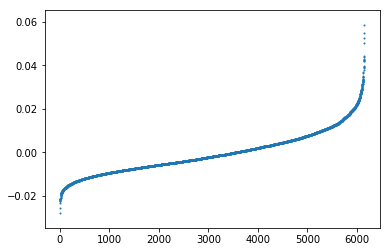

In [37]:
#create list for corr coeff for each cell and tone a
corr_list = []
for x in range(cell_traces.shape[0]):
   array = np.corrcoef(cell_traces[x],audio_peak_13700)
   corr_list.append([array[0,1]])

# FIG 11
#sort and plot
corr_list.sort() 
corr_array = np.array(corr_list)
plt.scatter([x+1 for x in list(range(cell_traces.shape[0]))], corr_array, s=1)

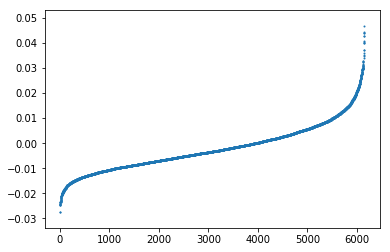

In [38]:
#create list for corr coeff for each cell and tone b
corr_list = []
for x in range(cell_traces.shape[0]):
   array = np.corrcoef(cell_traces[x],audio_peak_8750)
   corr_list.append([array[0,1]])

# FIG 12
#sort and plot
corr_list.sort()
corr_array = np.array(corr_list)
plt.scatter([x+1 for x in list(range(cell_traces.shape[0]))], corr_array, s=1)

## Modelling (no tone vs any tone) FIG 13

In [116]:
# a marginal regression p-value threshold was performed, and can be viewed in "marginal_filtering.ipynb"
# the results are converted into csv and loaded here.
data_train = pd.read_csv('data/data_train_anytone_new.csv')
data_test = pd.read_csv('data/data_test_anytone_new.csv')

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

### Random Forest Classifier

In [118]:
# split data and train
X = data_train.iloc[:,6:]
y = data_train.iloc[:,1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regressor = RandomForestClassifier(n_estimators = 500, max_depth = 100, random_state = 123)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# prediction
y_pred = regressor.predict(data_test.iloc[:,6:])

In [119]:
# calculate the accuracy
def group_consecutives(vals, step=1):
    """Return list of consecutive lists of numbers from vals (number list)."""
    run = []
    result = [run]
    expect = None
    for v in vals:
        if (v == expect) or (expect is None):
            run.append(v)
        else:
            run = [v]
            result.append(run)
        expect = v + step
    return result

def get_results(data_test, y_pred, argwhere):
    true_tone = np.argwhere(data_test.iloc[:,1] == argwhere)
    pred_tone = np.argwhere(y_pred == argwhere)

    true_tone = true_tone.transpose()[0]
    pred_tone = pred_tone.transpose()[0]

    group_true = group_consecutives(true_tone)
    group_pred = group_consecutives(pred_tone)

    true_tone_group = []

    for i in group_true:

        true_tone_group.append(list(range(i[0] - 15, i[len(i) - 1] + 15)))

    true_tone_eval = [item for sublist in true_tone_group for item in sublist]

    res = []

    for i in range(len(group_pred)):

        if not set(group_pred[i]).isdisjoint(true_tone_eval):

            res.append(True)

        else:

            res.append(False)
    return res

res = get_results(data_test, y_pred, argwhere=1)
sum(res)/len(res)

0.6272727272727273

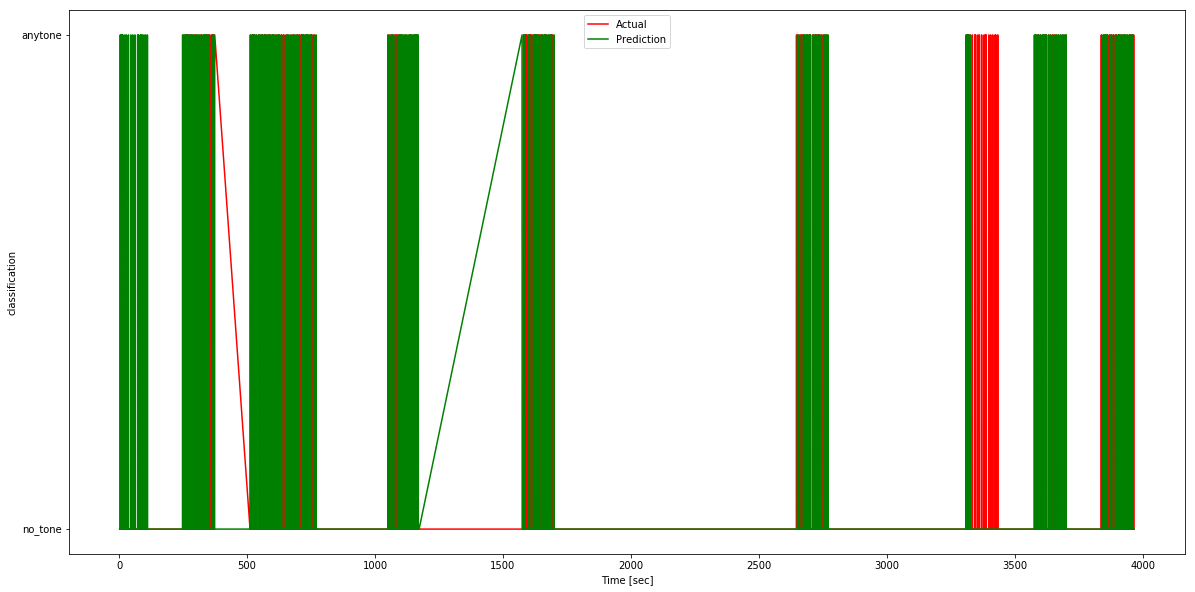

In [120]:
# plot for random forest prediction
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 10)
p1, = plt.plot(data_test.iloc[:,5], data_test.iloc[:,1], color='red')
p2, = plt.plot(data_test.iloc[:,5], y_pred, color='green')
ax.set_yticks([0, 1])
y_ticks = ['no_tone', 'anytone']
ax.set_yticklabels(y_ticks)
l = plt.legend([p1, p2], ["Actual", "Prediction"])
plt.ylabel('classification')
plt.xlabel('Time [sec]')
plt.show()

### Decision tree

In [121]:
from sklearn.tree import DecisionTreeClassifier
X = data_train.iloc[:,6:]
y = data_train.iloc[:,1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regressor = DecisionTreeClassifier(max_depth = 200)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred = regressor.predict(data_test.iloc[:,6:])

In [122]:
res = get_results(data_test, y_pred, argwhere=1)
sum(res)/len(res)

0.6583629893238434

### Logistic Regression (FIG 13)

In [123]:
from sklearn.linear_model.logistic import LogisticRegression
X = data_train.iloc[:,6:]
y = data_train.iloc[:,1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
classifier=LogisticRegression(penalty='l2', dual=False, C=2, random_state=123, solver='liblinear', max_iter=100)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = classifier.predict(data_test.iloc[:,6:])

In [124]:
res = get_results(data_test, y_pred, argwhere=1)
sum(res)/len(res)

0.6666666666666666

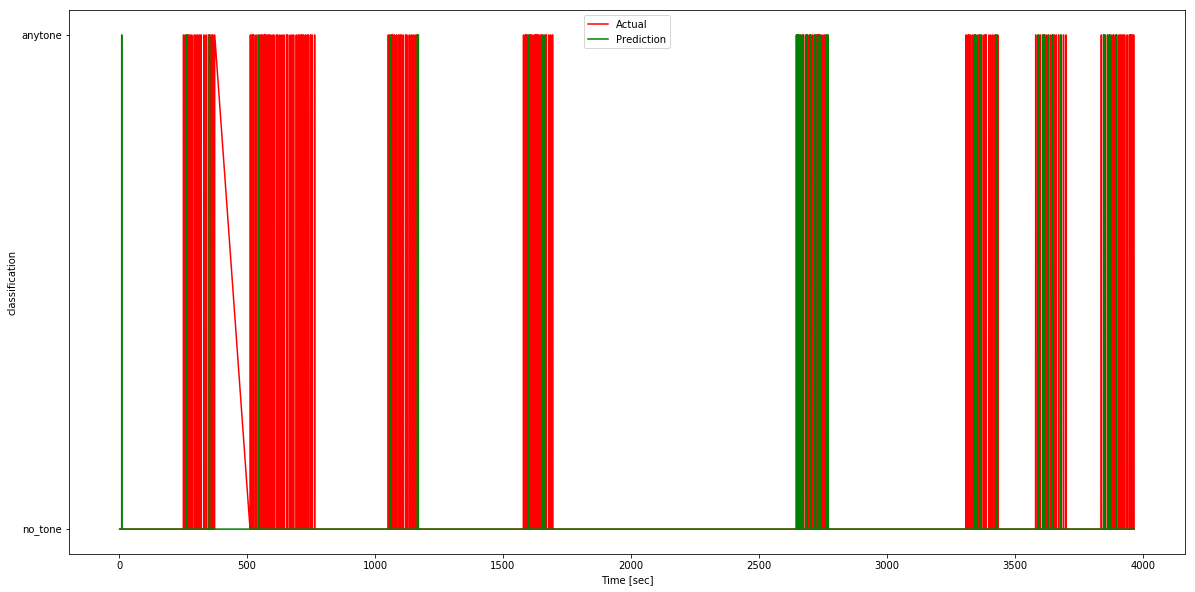

In [125]:
# FIG 13 (in the report this figure is zoomed in)
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 10)
p1, = plt.plot(data_test.iloc[:,5], data_test.iloc[:,1], color='red')
p2, = plt.plot(data_test.iloc[:,5], y_pred, color='green')
plt.yticks([0, 1])
y_ticks = ['no_tone', 'anytone']
ax.set_yticks([0, 1])
ax.set_yticklabels(y_ticks)
l = plt.legend([p1, p2], ["Actual", "Prediction"])
plt.ylabel('classification')
plt.xlabel('Time [sec]')
plt.show()

## Modeling (tone a vs no tone, vs tone b) FIG 14

In [126]:
data_train = pd.read_csv('data/data_train_eithertone_new.csv')
data_test = pd.read_csv('data/data_test_eithertone_new.csv')

### Random Forest Classifier

In [135]:
# split data and train
X = data_train.iloc[:,6:]
y = data_train.iloc[:,3].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regressor = RandomForestClassifier(n_estimators = 500, max_depth = 100, random_state = 123)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# prediction
y_pred = regressor.predict(data_test.iloc[:,6:])

In [140]:
def get_results_eithertone(data_test, y_pred, argwhere):
    true_tone = np.argwhere(data_test.iloc[:,3] == argwhere)
    pred_tone = np.argwhere(y_pred == argwhere)

    true_tone = true_tone.transpose()[0]
    pred_tone = pred_tone.transpose()[0]

    group_true = group_consecutives(true_tone)
    group_pred = group_consecutives(pred_tone)

    true_tone_group = []

    for i in group_true:

        true_tone_group.append(list(range(i[0] - 15, i[len(i) - 1] + 15)))

    true_tone_eval = [item for sublist in true_tone_group for item in sublist]

    res = []

    for i in range(len(group_pred)):

        if not set(group_pred[i]).isdisjoint(true_tone_eval):

            res.append(True)

        else:

            res.append(False)
    return res
        
res1 = get_results_eithertone(data_test, y_pred, 1)
res2 = get_results_eithertone(data_test, y_pred, -1)

# final accuracy for both tones
(sum(res1)+ sum(res2))/(len(res1)+ len(res2))

0.3274336283185841

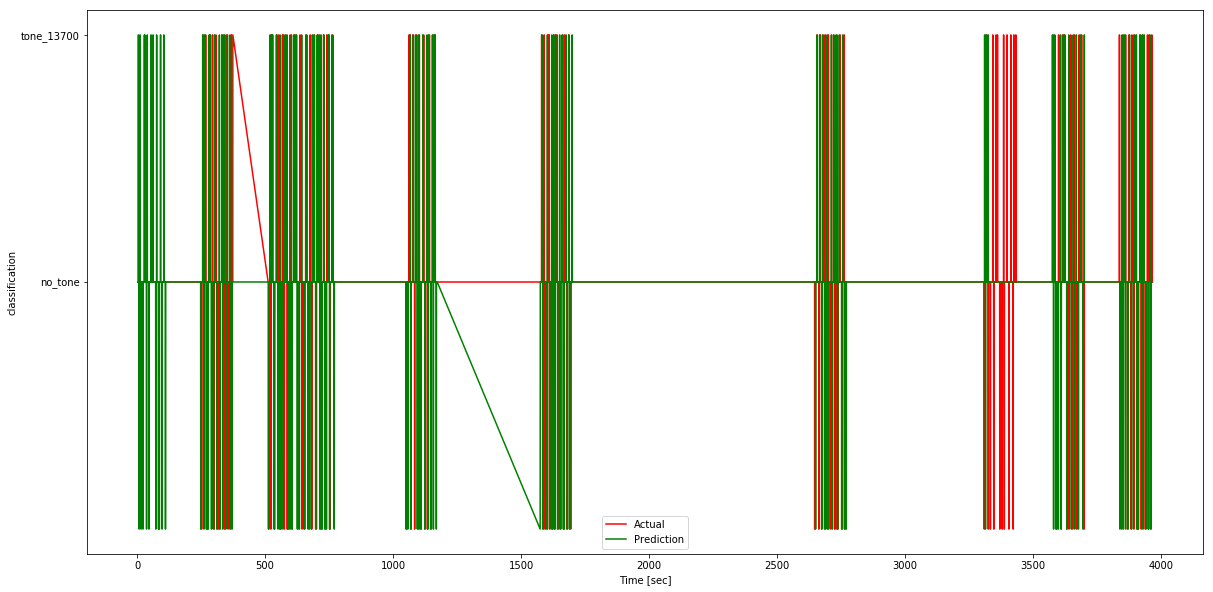

In [141]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 10)
p1, = plt.plot(data_test.iloc[:,5], data_test.iloc[:,3], color='red')
p2, = plt.plot(data_test.iloc[:,5], y_pred, color='green')
plt.yticks([0, 1])
y_ticks = ['no_tone', 'tone_13700']
ax.set_yticks([0, 1])
ax.set_yticklabels(y_ticks)
l = plt.legend([p1, p2], ["Actual", "Prediction"])
plt.ylabel('classification')
plt.xlabel('Time [sec]')
plt.show()

### Decision tree

In [142]:
from sklearn.tree import DecisionTreeClassifier
X = data_train.iloc[:,6:]
y = data_train.iloc[:,3].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regressor = DecisionTreeClassifier(max_depth = 200)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred = regressor.predict(data_test.iloc[:,6:])

In [143]:
# accuracy1 (for tone 1, run this chunk first)
res1 = get_results_eithertone(data_test, y_pred, argwhere=1)

# accuracy2 (for tone 2, run this chunk after accuracy1)
res2 = get_results_eithertone(data_test, y_pred, argwhere=-1)

# final accuracy for both tones
(sum(res1)+ sum(res2))/(len(res1)+ len(res2))

0.32517482517482516

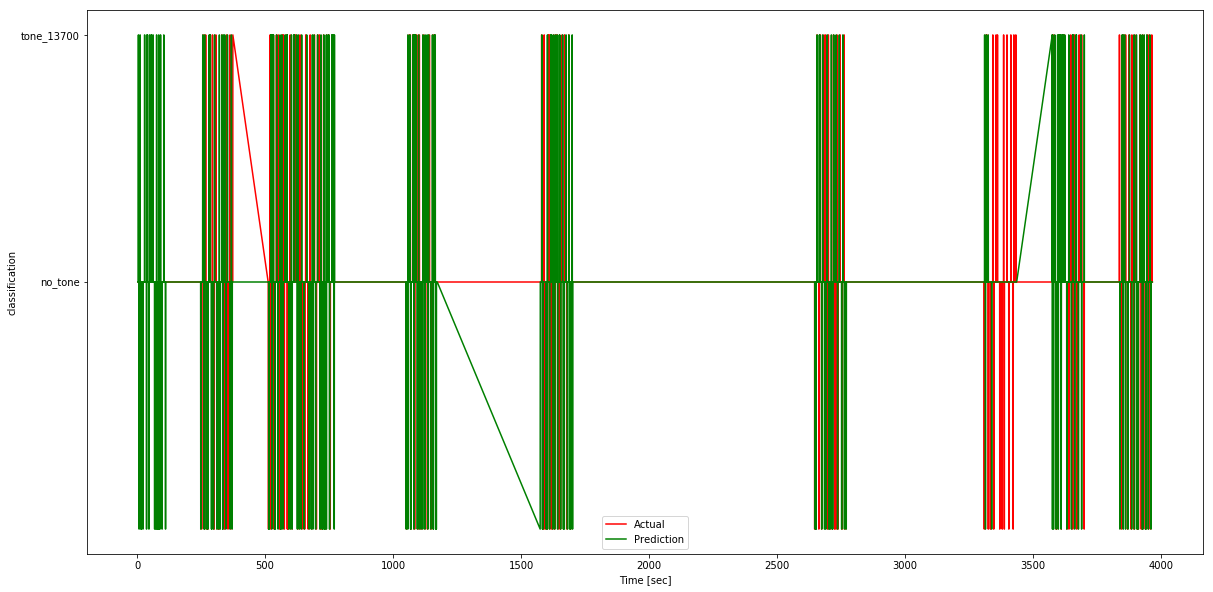

In [144]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 10)
p1, = plt.plot(data_test.iloc[:,5], data_test.iloc[:,3], color='red')
p2, = plt.plot(data_test.iloc[:,5], y_pred, color='green')
plt.yticks([0, 1])
y_ticks = ['no_tone', 'tone_13700']
ax.set_yticks([0, 1])
ax.set_yticklabels(y_ticks)
l = plt.legend([p1, p2], ["Actual", "Prediction"])
plt.ylabel('classification')
plt.xlabel('Time [sec]')
plt.show()

### Logistic Regression (FIG 14)

In [145]:
from sklearn.linear_model.logistic import LogisticRegression
X = data_train.iloc[:,6:]
y = data_train.iloc[:,3].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
classifier=LogisticRegression(C=2, solver='lbfgs', multi_class='multinomial')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred = classifier.predict(data_test.iloc[:,6:])

In [146]:
# accuracy1 (for tone 1, run this chunk first)
res1 = get_results_eithertone(data_test, y_pred, argwhere=1)

# accuracy2 (for tone 2, run this chunk after accuracy1)
res2 = get_results_eithertone(data_test, y_pred, argwhere=-1)

# final accuracy for both tones
(sum(res1)+ sum(res2))/(len(res1)+ len(res2))

0.352112676056338

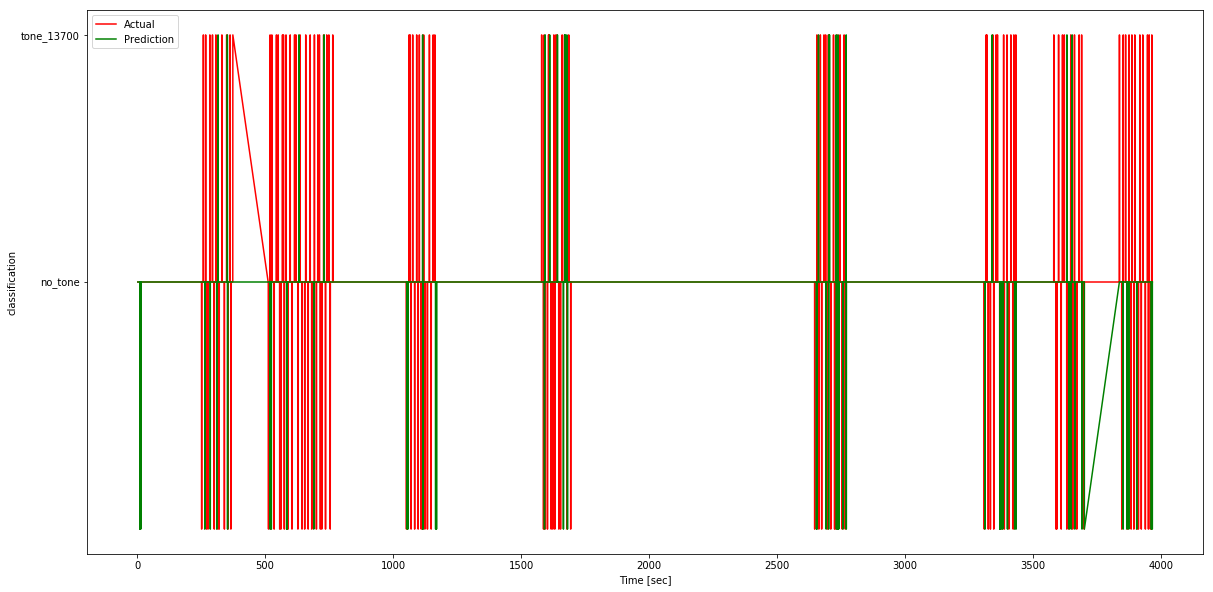

In [148]:
# FIG 14 (zoomed-in in the report)
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 10)
p1, = plt.plot(data_test.iloc[:,5], data_test.iloc[:,3], color='red')
p2, = plt.plot(data_test.iloc[:,5], y_pred, color='green')
plt.yticks([0, 1])
y_ticks = ['no_tone', 'tone_13700']
ax.set_yticks([0, 1])
ax.set_yticklabels(y_ticks)
l = plt.legend([p1, p2], ["Actual", "Prediction"])
plt.ylabel('classification')
plt.xlabel('Time [sec]')
plt.show()